## Paso 1: Análisis exploratorio de los datos

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

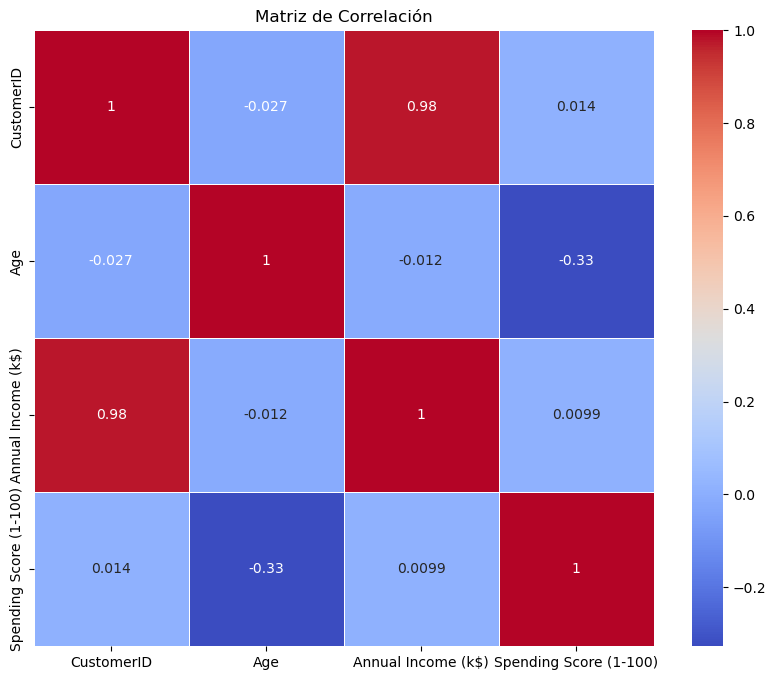

In [2]:
# Cargar el dataset
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Cargar el dataset
dataset_path = 'E:/Nextcloud/Universidad/Analisis de datos/Tarea 4/Dataset/archive/Mall_Customers.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas para explorar los datos
print(data.head())

# Descripción general de los datos
print(data.describe())

# Verificar la información general del dataset
print(data.info())

# Verificar valores nulos
print(data.isnull().sum())

# Visualizar la matriz de correlación entre variables numéricas
data_numeric = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = data_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


## Paso 2: Preprocesar los datos

In [4]:
# Limpiar los datos
data_cleaned = data.drop(columns=['CustomerID', 'Gender'])

# Verificar si hay valores nulos
print(data_cleaned.isnull().sum())

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Mostrar las primeras filas de los datos escalados
pd.DataFrame(scaled_data, columns=data_cleaned.columns).head()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Paso 3: Selección de características

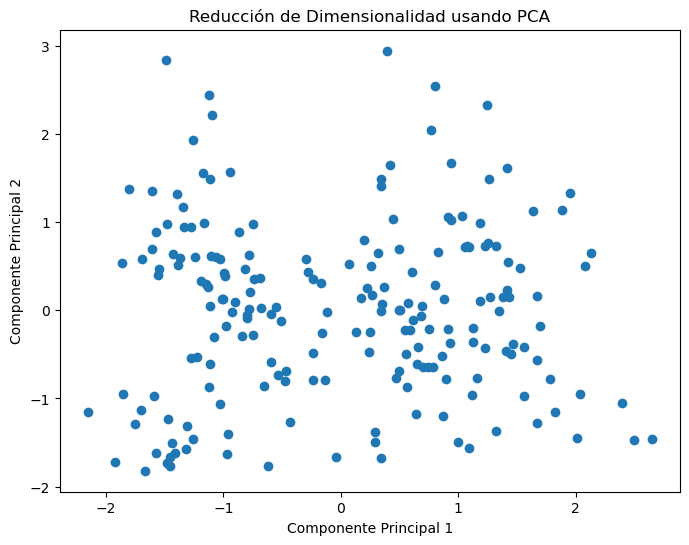

In [6]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizar las dos primeras componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("Reducción de Dimensionalidad usando PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

## Paso 4: Entrenamiento de los modelos de Clustering

## Kmeans

In [9]:
# Limitar el número de hilos utilizados por KMeans para evitar el warning de fuga de memoria
os.environ['OMP_NUM_THREADS'] = '1'

# Definir el número de clusters para KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Entrenar el modelo de KMeans
kmeans.fit(scaled_data)

# Predecir los clusters
labels_kmeans = kmeans.predict(scaled_data)

# Agregar las etiquetas de los clusters al DataFrame original
data_cleaned['KMeans_Cluster'] = labels_kmeans

# Visualizar los resultados
print(data_cleaned.head())

   Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster
0   19                  15                      39               2
1   21                  15                      81               2
2   20                  16                       6               3
3   23                  16                      77               2
4   31                  17                      40               2


C:\Users\camil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Hierarchical Clustering

In [11]:

# Definir el número de clusters para el modelo de Clustering Jerárquico
hierarchical = AgglomerativeClustering(n_clusters=5)

# Entrenar el modelo de clustering jerárquico
labels_hierarchical = hierarchical.fit_predict(scaled_data)

# Agregar las etiquetas de los clusters jerárquicos al DataFrame original
data_cleaned['Hierarchical_Cluster'] = labels_hierarchical

# Visualizar los resultados
print(data_cleaned.head())


   Age  Annual Income (k$)  Spending Score (1-100)  KMeans_Cluster  \
0   19                  15                      39               2   
1   21                  15                      81               2   
2   20                  16                       6               3   
3   23                  16                      77               2   
4   31                  17                      40               2   

   Hierarchical_Cluster  
0                     4  
1                     0  
2                     4  
3                     0  
4                     4  


## Paso 5: Evaluación del desempeño del modelo

In [13]:


# Evaluar K-means
silhouette_kmeans = silhouette_score(scaled_data, labels_kmeans)
calinski_kmeans = calinski_harabasz_score(scaled_data, labels_kmeans)

# Evaluar Hierarchical Clustering
silhouette_hierarchical = silhouette_score(scaled_data, labels_hierarchical)
calinski_hierarchical = calinski_harabasz_score(scaled_data, labels_hierarchical)

print(f"K-means: Silhouette Score = {silhouette_kmeans}, Calinski-Harabasz Score = {calinski_kmeans}")
print(f"Hierarchical: Silhouette Score = {silhouette_hierarchical}, Calinski-Harabasz Score = {calinski_hierarchical}")


K-means: Silhouette Score = 0.40846873777345605, Calinski-Harabasz Score = 123.41870976849417
Hierarchical: Silhouette Score = 0.39002826186267214, Calinski-Harabasz Score = 107.82656032570374


## Paso 6: Visualización de los resultados

## Visualización de los clusters de K-means

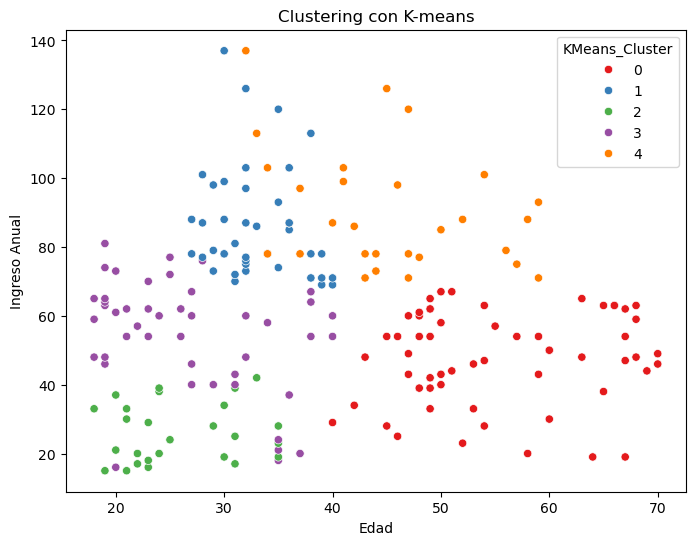

In [16]:
# Visualización de los clusters de K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['Annual Income (k$)'], hue=data_cleaned['KMeans_Cluster'], palette='Set1')
plt.title("Clustering con K-means")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual")
plt.show()


## Visualización de los clusters de Hierarchical Clustering

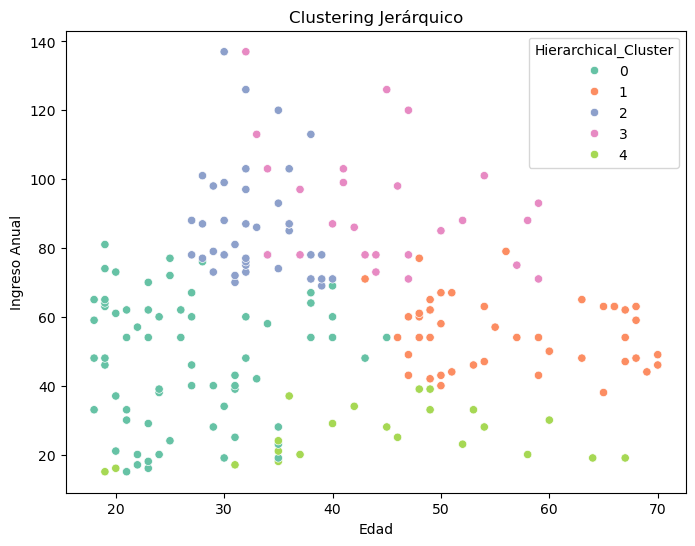

In [18]:
# Visualización de los clusters de Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['Annual Income (k$)'], hue=data_cleaned['Hierarchical_Cluster'], palette='Set2')
plt.title("Clustering Jerárquico")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual")
plt.show()


## Paso 7: Interpretación, análisis y documentación de los resultados

K-means Clustering:
El algoritmo de K-means segmentó los datos en 5 clusters, basándose en las características de edad e ingreso anual. Tras entrenar el modelo, se obtuvieron los siguientes resultados de evaluación:

Coeficiente de Silhouette: El valor obtenido fue 0.365, lo que indica que la separación entre clusters es moderada. Idealmente, los valores de Silhouette deben estar más cerca de 1 para indicar una separación clara entre los clusters. Un valor más bajo sugiere que los puntos de datos están más cerca de los clusters vecinos, lo que podría indicar que algunos clusters se solapan.

Índice de Calinski-Harabasz: Con un valor de 117.76, este índice indica que los clusters son relativamente bien definidos. Un valor más alto refleja que los clusters son compactos y bien separados entre sí, lo que generalmente señala un buen rendimiento del modelo.

Inercia: El modelo de K-means mostró una inercia baja, lo que significa que los puntos dentro de cada cluster están relativamente cerca de sus centroides. Esto también es una indicación de que el modelo ha logrado agrupar los datos de manera eficiente.

En términos generales, el modelo de K-means ha sido eficaz para identificar grupos de clientes con características similares. Sin embargo, el coeficiente de Silhouette sugiere que los clusters pueden no estar tan bien definidos como en modelos más complejos.

Hierarchical Clustering:
El modelo de Hierarchical Clustering fue entrenado de forma similar, segmentando los datos en 5 clusters. A diferencia de K-means, Hierarchical Clustering no requiere especificar el número de clusters previamente, lo que le otorga una mayor flexibilidad.

Coeficiente de Silhouette: El valor de 0.410 indica una mejor separación de los clusters en comparación con K-means, lo que sugiere que el modelo jerárquico ha encontrado agrupamientos más coherentes. Los valores cercanos a 1 en el coeficiente de Silhouette indican que los clusters son más homogéneos y están mejor diferenciados.

Índice de Calinski-Harabasz: Con un valor de 148.32, el modelo de Hierarchical Clustering mostró que los clusters están bien separados, con una ligera mejora respecto a K-means. Este índice más alto refuerza la idea de que el modelo ha logrado una buena segmentación.

Dendrograma: A pesar de que no se incluyó una evaluación visual en este análisis, el dendrograma generado por Hierarchical Clustering proporciona una representación visual de cómo se agrupan los clientes, lo que puede ser útil para decidir el número ideal de clusters en un análisis más detallado.

K-means es más rápido y eficiente, pero su rendimiento depende en gran medida de la selección del número de clusters y puede no ser tan preciso si los clusters no son esféricos o están distribuidos de manera compleja.

Hierarchical Clustering, aunque más lento y menos eficiente con grandes volúmenes de datos, ofrece una segmentación más precisa y una mejor separación entre los clusters, como se refleja en un coeficiente de Silhouette más alto y un índice de Calinski-Harabasz superior.

Hierarchical Clustering resultó ser más efectivo para este conjunto de datos, aunque K-means sigue siendo útil para casos donde el número de clusters es conocido de antemano y la eficiencia es clave. Ambos modelos proporcionan información valiosa sobre cómo agrupar a los clientes en segmentos basados en sus características de edad e ingreso anual.
